# Task 1

## Import Libraries

In [115]:
import pandas as pd
import numpy as np

## Import raw data and merge the data

In [116]:
Nextbike_bochum_raw = pd.read_csv("./dataset/bochum.csv")
Nextbike_leipzig_raw = pd.read_csv("./dataset/leipzig.csv")
Nextbike_raw = Nextbike_bochum_raw.append(Nextbike_leipzig_raw)

Nextbike_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202697 entries, 0 to 185326
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            202697 non-null  object 
 1   time           202697 non-null  object 
 2   b_number       202697 non-null  int64  
 3   city           202697 non-null  object 
 4   trip_duration  202697 non-null  object 
 5   orig_lat       202697 non-null  float64
 6   orig_lng       202697 non-null  float64
 7   dest_lat       202697 non-null  float64
 8   dest_lng       202697 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 15.5+ MB


## Look for null values

In [117]:
Nextbike_raw.isnull().sum().sort_values(ascending=False)

dest_lng         0
dest_lat         0
orig_lng         0
orig_lat         0
trip_duration    0
city             0
b_number         0
time             0
day              0
dtype: int64

In [118]:
#Copy dataset for cleaning
Nextbike_clean = Nextbike_raw

## Correct Data Types

In [119]:
#Converting Trip Length to timedelta
Nextbike_clean['trip_duration'] = pd.to_timedelta(Nextbike_clean['trip_duration'])

#Converting start-time to datetime
Nextbike_clean['timestamp'] = pd.to_datetime(Nextbike_clean['day'] + ' ' +  Nextbike_clean['time'])
Nextbike_clean.drop(columns=['day','time'], inplace = True)

## Add columns for analysis

In [136]:
#Round datetime and extract possible categorisation attributes
Nextbike_clean['timestamp_rounded'] = Nextbike_clean['timestamp'].dt.floor('H')

Nextbike_clean['Weekday'] = Nextbike_clean['timestamp_rounded'].dt.weekday
Nextbike_clean['Week'] = Nextbike_clean['timestamp_rounded'].dt.isocalendar().week

Nextbike_clean['Time'] = Nextbike_clean['timestamp_rounded'].dt.time
Nextbike_clean["Time"] = Nextbike_clean["Time"].astype(str).str[:2].astype(int)

Nextbike_clean["date"] = Nextbike_clean.timestamp.dt.date
Nextbike_clean["date_str"] = Nextbike_clean.timestamp.dt.date.astype(str)

#take trip duration in minutes, calculate 1€ per 30 minutes of usage
Nextbike_clean["revenue"] = np.ceil((Nextbike_clean.trip_duration.dt.total_seconds()/60) /30)


#output
Nextbike_clean

,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,timestamp,timestamp_rounded,Weekday,Time,date,date_str,revenue,Week
0,683,bochum,0 days 00:10:00,51.489814,7.232856,51.479592,7.222239,2019-02-08 12:06:00,2019-02-08 12:00:00,4,12,2019-02-08,2019-02-08,1.0,6
1,683,bochum,0 days 00:14:00,51.479592,7.222239,51.472366,7.250500,2019-02-10 01:58:00,2019-02-10 01:00:00,6,1,2019-02-10,2019-02-10,1.0,6
2,683,bochum,0 days 00:28:00,51.472366,7.250500,51.479592,7.222239,2019-02-11 06:33:00,2019-02-11 06:00:00,0,6,2019-02-11,2019-02-11,1.0,7
3,683,bochum,0 days 00:58:00,51.479592,7.222239,51.483023,7.215314,2019-02-11 13:31:00,2019-02-11 13:00:00,0,13,2019-02-11,2019-02-11,2.0,7
4,683,bochum,0 days 00:22:00,51.483023,7.215314,51.479592,7.222239,2019-02-11 14:32:00,2019-02-11 14:00:00,0,14,2019-02-11,2019-02-11,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185322,99979,leipzig,0 days 00:07:00,51.468822,11.290048,51.468547,11.289899,2019-05-25 10:58:00,2019-05-25 10:00:00,5,10,2019-05-25,2019-05-25,1.0,21
185323,99979,leipzig,0 days 01:16:00,51.468756,11.289723,51.469324,11.289366,2019-05-27 09:32:00,2019-05-27 09:00:00,0,9,2019-05-27,2019-05-27,3.0,22
185324,99979,leipzig,0 days 00:03:00,51.469044,11.289348,51.469093,11.289432,2019-05-27 11:02:00,2019-05-27 11:00:00,0,11,2019-05-27,2019-05-27,1.0,22
185325,99982,leipzig,0 days 01:44:00,51.341165,12.365045,51.341065,12.365005,2019-02-11 11:47:00,2019-02-11 11:00:00,0,11,2019-02-11,2019-02-11,4.0,7


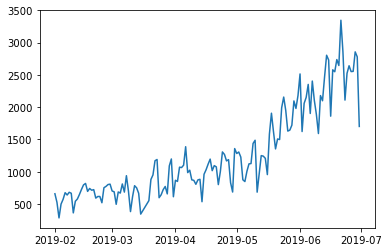

In [121]:
MDT = Nextbike_clean[Nextbike_clean["city"]=="leipzig"]

MDT = MDT.groupby(by=["date"]).agg(
count=("b_number","count"))

plt.plot(MDT)



# Task 2

## Import Visualisation Libaries

In [137]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Split data for analysis

In [153]:
Nextbike_clean_l = Nextbike_clean[Nextbike_clean.city == "leipzig"]
Nextbike_clean_b = Nextbike_clean[Nextbike_clean.city == "bochum"]

df = Nextbike_clean_l[:]

## Find out size of the fleet
The idea is that a bike is recognized as part of the fleet if it has been rented in the last 7 days. So the size of the fleet is the amount of unique Bike IDs that have records for the last 7 days. We calculate this on a daily level to be precise yet not too intense to compute.

In [139]:
start_date = df.date.min()
end_date = df.date.max()
delta = pd.to_timedelta("1d")

dates = []
while start_date <= end_date:
    dates.append(start_date.strftime("%Y-%m-%d"))
    start_date += delta


fleet_size = pd.DataFrame([], index = dates, columns = ["search_array","fleet_size"]) 

search_array = []
for index, row in fleet_size.iterrows():
    search_array.append(index)
    if len(search_array) > 7:
        search_array.pop(0)
    #row["date_str"] = index
    row['search_array'] = search_array[:]
    row['fleet_size'] = df[df.date.astype(str).isin(search_array[:])].b_number.nunique()
    
fleet_size.drop(columns=["search_array"], inplace = True)

### Test for this

In [125]:
searches = ["2019-06-24", "2019-06-25", "2019-06-26", "2019-06-27", "2019-06-28", "2019-06-29", "2019-06-30"]
Nextbike_clean_l = Nextbike_clean[Nextbike_clean.city == "leipzig"]
Nextbike_clean_l[Nextbike_clean_l.date.astype(str).isin(searches)].b_number.nunique()

790

## Analysis for revenue and fleet size

In [126]:
df_by_date = df.groupby("date_str").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    used_bikes=('b_number', pd.Series.nunique))

df_by_date.index.astype(str, copy = False)
fleet_size.index.astype(str, copy= False)

df_by_date_merged = fleet_size.join(df_by_date)
df_by_date_merged["usage"] = df_by_date_merged["used_bikes"] / df_by_date_merged["fleet_size"]

df_by_date_merged

,fleet_size,revenue,trips,used_bikes,usage
2019-02-01,256,785.0,659.0,256.0,1
2019-02-02,329,664.0,526.0,241.0,0.732523
2019-02-03,350,352.0,285.0,162.0,0.462857
2019-02-04,390,623.0,499.0,237.0,0.607692
2019-02-05,421,654.0,573.0,251.0,0.5962
...,...,...,...,...,...
2019-06-26,785,3039.0,2552.0,585.0,0.745223
2019-06-27,787,2993.0,2555.0,600.0,0.762389
2019-06-28,789,3417.0,2857.0,627.0,0.794677
2019-06-29,795,3737.0,2780.0,625.0,0.786164


In [154]:
df_by_hour = df.groupby("timestamp_rounded").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    date=("date","min"),
    weekday=("Weekday","min"),
    week = ("Week","min"),
    time = ("Time","min"),
    used_bikes=('b_number', pd.Series.nunique))

fleet_size.index.astype(str, copy= False)
df_by_hour["date_str"] = df_by_hour["date"].astype(str)


#df_by_hour_merged = df_by_hour.join(fleet_size)
df_by_hour_merged = pd.merge(df_by_hour, fleet_size, right_index=True, left_on='date_str')
df_by_hour_merged["usage"] = df_by_hour_merged["used_bikes"] / df_by_hour_merged["fleet_size"]



df_by_hour_merged

,revenue,trips,date,weekday,week,time,used_bikes,date_str,fleet_size,usage
timestamp_rounded,,,,,,,,,,
2019-02-01 00:00:00,9.0,8,2019-02-01,4,5,0,8,2019-02-01,256,0.03125
2019-02-01 01:00:00,9.0,7,2019-02-01,4,5,1,7,2019-02-01,256,0.0273438
2019-02-01 02:00:00,7.0,2,2019-02-01,4,5,2,2,2019-02-01,256,0.0078125
2019-02-01 03:00:00,3.0,3,2019-02-01,4,5,3,3,2019-02-01,256,0.0117188
2019-02-01 04:00:00,9.0,8,2019-02-01,4,5,4,8,2019-02-01,256,0.03125
...,...,...,...,...,...,...,...,...,...,...
2019-06-30 19:00:00,116.0,91,2019-06-30,6,26,19,86,2019-06-30,790,0.108861
2019-06-30 20:00:00,104.0,87,2019-06-30,6,26,20,82,2019-06-30,790,0.103797
2019-06-30 21:00:00,82.0,66,2019-06-30,6,26,21,62,2019-06-30,790,0.078481


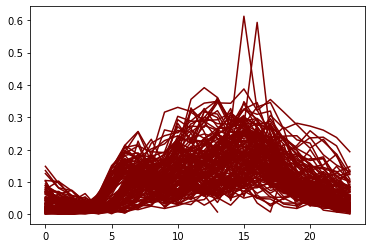

In [169]:
for date in df_by_hour["date"].unique():
    df=df_by_hour_merged[df_by_hour_merged["date"]==date]
    x = df["time"]
    kpi = df["revenue"] / df["fleet_size"]
    plt.plot(x,kpi,color=(0.5,0,0))

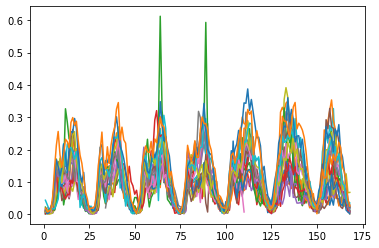

In [166]:
df_by_hour_merged["weektime"] = df_by_hour_merged["weekday"] * 24 + df_by_hour_merged["time"] + 1


for week in df_by_hour["week"].unique():
    df=df_by_hour_merged[df_by_hour_merged["week"]==week]
    x = df["weektime"]
    kpi = df["revenue"] / df["fleet_size"]
    plt.plot(x,kpi)

_____________________________________________________________________________________________________________

## Availability Analysis
This function calculates what happened between rental times. It analyzes whether, between rentals, a bike has been available at a certain station or whether it has been moved to a different location. This can then be used for example to calculate the number of available bikes at a certain station at a single time. We use it to calculate our KPI of percentage of stations without available bikes. It can be used for further analysis in this topic as well.

In [93]:
round_factor = 2

In [94]:
df2 = df

df2["timestamp_end"] = df2["timestamp"] + df2["trip_duration"]
df2=df2.drop(columns=['date', 'date_str', "revenue", "Weekday", "Time", "timestamp_rounded","trip_duration"])

df2 = df2.round({"orig_lat":round_factor, 'orig_lng':round_factor, 'dest_lat':round_factor, "dest_lng":round_factor})

#make sure it is sorted by b_number, then timestamp
df2 = df2.sort_values(by=['b_number','timestamp'])
#make sure the index is still +1 every time after sorting
df2.reset_index(inplace=True)
df2 = df2.rename(columns={"index": "original_index"})


df2

,original_index,b_number,city,orig_lat,orig_lng,dest_lat,dest_lng,timestamp,timestamp_end
0,0,10900,leipzig,51.33,12.34,51.33,12.34,2019-04-16 11:17:00,2019-04-16 11:29:00
1,1,10900,leipzig,51.33,12.34,51.33,12.34,2019-04-16 11:35:00,2019-04-16 11:43:00
2,2,10900,leipzig,51.33,12.34,51.33,12.34,2019-04-16 11:53:00,2019-04-16 12:33:00
3,3,10900,leipzig,51.33,12.34,51.33,12.34,2019-04-16 14:35:00,2019-04-16 14:38:00
4,4,20000,leipzig,51.34,12.38,51.33,12.34,2019-05-21 09:47:00,2019-05-21 10:07:00
...,...,...,...,...,...,...,...,...,...
185322,185322,99979,leipzig,51.47,11.29,51.47,11.29,2019-05-25 10:58:00,2019-05-25 11:05:00
185323,185323,99979,leipzig,51.47,11.29,51.47,11.29,2019-05-27 09:32:00,2019-05-27 10:48:00
185324,185324,99979,leipzig,51.47,11.29,51.47,11.29,2019-05-27 11:02:00,2019-05-27 11:05:00
185325,185325,99982,leipzig,51.34,12.37,51.34,12.37,2019-02-11 11:47:00,2019-02-11 13:31:00


In [95]:
df3 = []

bike_number = 0
bike_city = ""

for index in df2.index:
    if  df2.at[index,"b_number"] != bike_number:
        bike_number = df2.at[index,"b_number"]
        bike_city = df2.at[index,"city"]
    else:
        lat = df2.at[index,"orig_lat"]
        lng = df2.at[index,"orig_lng"]
        time_start = df2.at[index-1,"timestamp_end"]
        time_end = df2.at[index,"timestamp"]
        
        action_type = "station"
        if lat == df2.at[index-1,"dest_lat"] and lng != df2.at[index-1,"dest_lng"]:
            action_type = "moved"
            
        d = {
            'b_number' : bike_number,
            'b_city' : bike_city,
            'lat' : lat,  # some formula for obtaining values
            'lng' : lng,
            'timestamp' : time_start,
            'action_type' : action_type+"_in"
            }
        df3.append(d)
        d = {
            'b_number' : bike_number,
            'b_city' : bike_city,
            'lat' : lat,  # some formula for obtaining values
            'lng' : lng,
            'timestamp' : time_end,
            'action_type' : action_type+"_out"
            }
        df3.append(d)

df3 = pd.DataFrame(df3)
df3["station"] = df3[["lat","lng"]].values.tolist()

In [96]:
df3

,b_number,b_city,lat,lng,timestamp,action_type,station
0,10900,leipzig,51.33,12.34,2019-04-16 11:29:00,station_in,"[51.33, 12.34]"
1,10900,leipzig,51.33,12.34,2019-04-16 11:35:00,station_out,"[51.33, 12.34]"
2,10900,leipzig,51.33,12.34,2019-04-16 11:43:00,station_in,"[51.33, 12.34]"
3,10900,leipzig,51.33,12.34,2019-04-16 11:53:00,station_out,"[51.33, 12.34]"
4,10900,leipzig,51.33,12.34,2019-04-16 12:33:00,station_in,"[51.33, 12.34]"
...,...,...,...,...,...,...,...
368633,99979,leipzig,51.47,11.29,2019-05-25 10:58:00,station_out,"[51.47, 11.29]"
368634,99979,leipzig,51.47,11.29,2019-05-25 11:05:00,station_in,"[51.47, 11.29]"
368635,99979,leipzig,51.47,11.29,2019-05-27 09:32:00,station_out,"[51.47, 11.29]"
368636,99979,leipzig,51.47,11.29,2019-05-27 10:48:00,station_in,"[51.47, 11.29]"


This algorithm takes goes over all records that relate to bikes standing at a certain station. For each change event, it calculates the effect on the capacity of a certain station.

In [97]:
#filter df3 for all events related to bikes standing at a station (not being moved between rides)
df3 = df3[df3["action_type"].isin(["station_in","station_out"])]

#filter correctly for the algorithm to work properly
df3["station"] = df3["station"].astype(str)
df3=df3.sort_values(by=['station','timestamp','action_type'])
df3.reset_index(inplace=True)
df3 = df3.rename(columns={"index": "original_index"})

df3["count"] = 0

station = ""
count = 0

for index in df3.index:
    action_type = df3.at[index,"action_type"]
    #if this is a different station, restart the calculation
    if  df3.at[index,"station"] != station:
        station = df3.at[index,"station"]
        count = 0
    if action_type == "station_in":
         count = count + 1
    elif action_type == "station_out":
        count = count - 1
    else:
        print("there was an error")
    
    df3.at[index,"count"] = count

<ipython-input-97-f85a3a4f2cec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["station"] = df3["station"].astype(str)


In [172]:
df5

,2019-02-01 00:00:00,2019-02-01 01:00:00,2019-02-01 02:00:00,2019-02-01 03:00:00,2019-02-01 04:00:00,2019-02-01 05:00:00,2019-02-01 06:00:00,2019-02-01 07:00:00,2019-02-01 08:00:00,2019-02-01 09:00:00,...,2019-06-30 14:00:00,2019-06-30 15:00:00,2019-06-30 16:00:00,2019-06-30 17:00:00,2019-06-30 18:00:00,2019-06-30 19:00:00,2019-06-30 20:00:00,2019-06-30 21:00:00,2019-06-30 22:00:00,2019-06-30 23:00:00
"[51.2, 12.42]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
"[51.2, 12.55]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[51.22, 12.28]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[51.22, 12.45]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[51.23, 12.33]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"[51.47, 11.29]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[51.5, 11.85]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[51.53, 12.32]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[51.56, 12.14]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This part produces a list of the minimum available bikes at a certain station. For example, if a station has had 2 bikes for the first ten minutes, then had 3 and in the end had only 1 bike left, this would count as 1 bike for the respective hour period. 
* If there was no change in available bikes, it takes the value for the most recent change event.
* If the number of available bikes changes to zero and no bikes ever get to the station again until the end of the data timeframe, it will not count as 0 bikes as the station might have been closed in the meantime (this should not count as "no bikes available)

In [98]:
df4 = df3
df4["timestamp_rounded"] = df4["timestamp"].dt.floor("H")
df4 = df4.sort_values(by=['station','timestamp'])

start_date = df4.timestamp_rounded.min()
end_date = df4.timestamp_rounded.max()
daterange = pd.date_range(start_date, end_date,freq='1H')

df5 = pd.DataFrame(index=daterange)

for station in df4.station.unique():
    df = df4[df4.station == station]
    df = df.groupby("timestamp_rounded").agg(
    min_count =("count","min"),
    last_value = ("count", lambda x: x.iloc[-1]))
    df = df.reindex(daterange, fill_value=None)
    df["last_value"] = df["last_value"].fillna(method='ffill')
    df["min_count"] = df.apply(
        lambda row: row['last_value']if np.isnan(row['min_count']) else row['min_count'],axis=1
    )
    for index, row in df[::-1].iterrows():
        if row["min_count"] == 0:
            row["min_count"] = None
        else:
            break
    df5[station] = df["min_count"]
    
df5 = df5.T


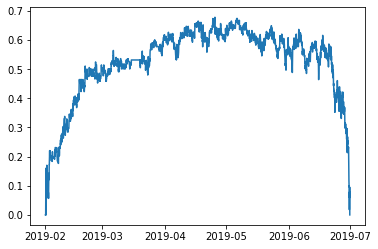

In [114]:
#df5.to_excel("ransposed.xlsx")
df6 = df5[df5 < 1].count() / df5.count() 
plt.plot(df6)

Proof of concept

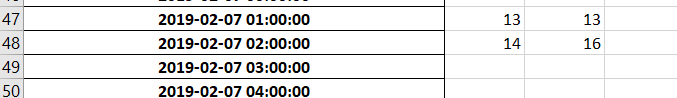

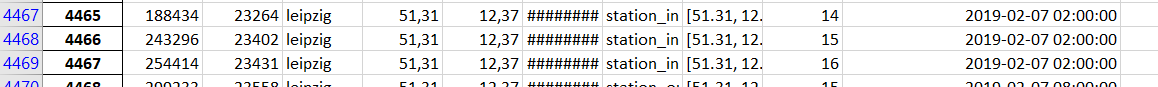

_______________________________

## Visualisation

In [40]:
dates = df_by_date_merged.index
fleetsize = df_by_date_merged["fleet_size"]
usage = df_by_date_merged["usage"]
usedbikes = df_by_date_merged["used_bikes"]

Fig_1, ax_1 = plt.subplots()


color = 'tab:red'
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Fleet Size', color=color)
ax_1.plot(dates, fleetsize, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

ax_2 = ax_1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:blue'

ax_2.set_ylabel("Used Bikes", color=color)
ax_2.plot(dates, usedbikes, color=color)
ax_2.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

NameError: name 'df_by_date_merged' is not defined

## Group by rounded start time

In [123]:
df_by_time = df.groupby("Time").agg(
    mean_length=('trip_duration', lambda x: np.mean(x)),
    trip_count=('b_number', 'count'))

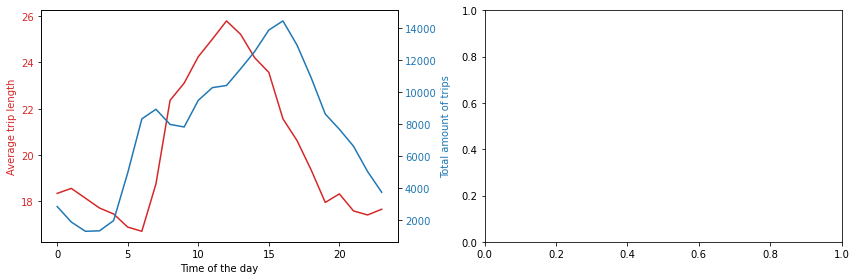

In [88]:
fig, (ax1, ax1_b) = plt.subplots(nrows = 1, ncols = 2, figsize= (12,4))

x = df_by_time.index
seconds = df_by_time["mean_length"].dt.total_seconds()/60
amount = df_by_time["trip_count"]

color = 'tab:red'
ax1.set_xlabel('Time of the day')
ax1.set_ylabel('Average trip length', color=color)
ax1.plot(x, seconds, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total amount of trips', color=color)  # we already handled the x-label with ax1
ax2.plot(x, amount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,timestamp,timestamp_rounded,Weekday,Time,date
2306,20199,leipzig,0 days 00:09:00,51.331342,12.358439,51.324615,12.336922,2019-02-01 10:06:00,2019-02-01 10:00:00,4,10,2019-02-01
2995,20205,leipzig,0 days 00:04:00,51.345991,12.399617,51.345084,12.406133,2019-02-01 17:24:00,2019-02-01 17:00:00,4,17,2019-02-01
2996,20205,leipzig,0 days 00:04:00,51.345084,12.406133,51.345538,12.414902,2019-02-01 17:48:00,2019-02-01 17:00:00,4,17,2019-02-01
2997,20205,leipzig,0 days 00:19:00,51.344861,12.414481,51.326982,12.374618,2019-02-02 14:29:00,2019-02-02 14:00:00,5,14,2019-02-02
2998,20205,leipzig,0 days 00:12:00,51.326796,12.374574,51.344213,12.390458,2019-02-02 19:19:00,2019-02-02 19:00:00,5,19,2019-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...
170764,39062,leipzig,0 days 00:06:00,51.332416,12.395124,51.326524,12.388068,2019-02-01 18:59:00,2019-02-01 18:00:00,4,18,2019-02-01
170765,39062,leipzig,0 days 00:12:00,51.326166,12.387858,51.339462,12.379896,2019-02-02 15:25:00,2019-02-02 15:00:00,5,15,2019-02-02
170766,39062,leipzig,0 days 00:13:00,51.339378,12.379863,51.331267,12.404177,2019-02-02 18:20:00,2019-02-02 18:00:00,5,18,2019-02-02
171107,39063,leipzig,0 days 00:05:00,51.305261,12.381538,51.301198,12.384442,2019-02-02 00:07:00,2019-02-02 00:00:00,5,0,2019-02-02


In [1]:
import geopandas as gpd
geopandas.datasets.available

ModuleNotFoundError: No module named 'geopandas'